## Trabajo final ML

### Grupo:

- Carlos Mauricio Arteaga 
- Miguel Angel Pablos Perea

In [1]:
## Librerias
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

c:\Users\Usuario\Documents\Curso_Machine_Learning_1\Codigo\Talleres


In [3]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas 

In [4]:
df = pd.read_csv('../../Datos/student-mat.csv', sep=';')    # Carga de la base de datos
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Descripcion del conjunto de datos

El DataFrame presentado fue tomado de la siguiente direccion url: https://archive.ics.uci.edu/dataset/320/student+performance

### Descripcion general de las columnas

- school: Escuela del estudiante (categórica binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).
- sex: Sexo del estudiante (binario: 'F' - femenino o 'M' - masculino).
- age: Edad del estudiante (entero: de 15 a 22 años).
- address: Tipo de dirección del hogar del estudiante (categórica binaria: 'U' - urbano o 'R' - rural).
- famsize: Tamaño de la familia (categórica binaria: 'LE3' - menos o igual a 3, 'GT3' - mayor a 3).
- Pstatus: Estado de convivencia de los padres (categórica binaria: 'T' - viven juntos, 'A' - separados).
- Medu: Nivel educativo de la madre (entero: 0 - ninguno, 1 - primaria (4º grado), 2 - 5º a 9º grado, 3 - secundaria, 4 - educación superior).
- Fedu: Nivel educativo del padre (entero: 0 - ninguno, 1 - primaria (4º grado), 2 - 5º a 9º grado, 3 - secundaria, 4 - educación superior).
- Mjob: Profesión de la madre (nominal: 'teacher' - docente, 'health' - relacionado con salud, 'services' - servicios civiles como administrativo o policía, 'at_home' - en casa, 'other' - otro).
- Fjob: Profesión del padre (nominal: 'teacher' - docente, 'health' - relacionado con salud, 'services' - servicios civiles como administrativo o policía, 'at_home' - en casa, 'other' - otro).
- reason: Razón para elegir esta escuela (nominal: 'home' - cerca de casa, 'reputation' - reputación de la escuela, 'course' - preferencia de curso, 'other' - otro).
- guardian: Tutor del estudiante (nominal: 'mother' - madre, 'father' - padre, 'other' - otro).
- traveltime: Tiempo de viaje de casa a la escuela (entero: 1 - menos de 15 minutos, 2 - 15 a 30 minutos, 3 - 30 minutos a 1 hora, 4 - más de 1 hora).
- studytime: Tiempo semanal de estudio (entero: 1 - menos de 2 horas, 2 - de 2 a 5 horas, 3 - de 5 a 10 horas, 4 - más de 10 horas).
- failures: Número de clases reprobadas anteriormente (entero: n si 1 <= n < 3, de lo contrario 4).
- schoolsup: Apoyo educativo extra (binario: 'yes' - sí, 'no' - no).
- famsup: Apoyo educativo de la familia (binario: 'yes' - sí, 'no' - no).
- paid: Clases pagadas adicionales dentro de la materia (Matemáticas o Portugués) (binario: 'yes' - sí, 'no' - no).
- activities: Actividades extracurriculares (binario: 'yes' - sí, 'no' - no).
- nursery: Asistió a la guardería (binario: 'yes' - sí, 'no' - no).
- higher: Desea cursar estudios superiores (binario: 'yes' - sí, 'no' - no).
- internet: Acceso a Internet en casa (binario: 'yes' - sí, 'no' - no).
- romantic: Tiene una relación romántica (binario: 'yes' - sí, 'no' - no).
- famrel: Calidad de las relaciones familiares (entero: de 1 - muy mala a 5 - excelente).
- freetime: Tiempo libre después de la escuela (entero: de 1 - muy bajo a 5 - muy alto).
- goout: Salidas con amigos (entero: de 1 - muy bajo a 5 - muy alto).
- Dalc: Consumo de alcohol entre semana (entero: de 1 - muy bajo a 5 - muy alto).
- Walc: Consumo de alcohol en fines de semana (entero: de 1 - muy bajo a 5 - muy alto).
- health: Estado de salud actual (entero: de 1 - muy malo a 5 - muy bueno).
- absences: Número de ausencias escolares (entero: de 0 a 93).
- G1: Nota del primer periodo (entero: de 0 a 20).
- G2: Nota del segundo periodo (entero: de 0 a 20).
- G3: Nota final (entero: de 0 a 20).

El contexto del conjunto de datos es el rendimiento de los alumnos de secundaria de dos colegios, los datos incluyen calificaciones de los alumnos, caracteristicas demograficas, sociales y relacionadas con la familia.




In [7]:
missing_values = df.isnull().sum()  # Verificar si hay valores nulos
missing_values 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
#Creamos una copia del dataframe original para el proceso de transofrmación de datos

df_final = df.copy()
df_final

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


## Fase 1. Exploracion de datos

In [9]:
# Descripción general de las variables
df_final.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variables numericas

<Axes: >

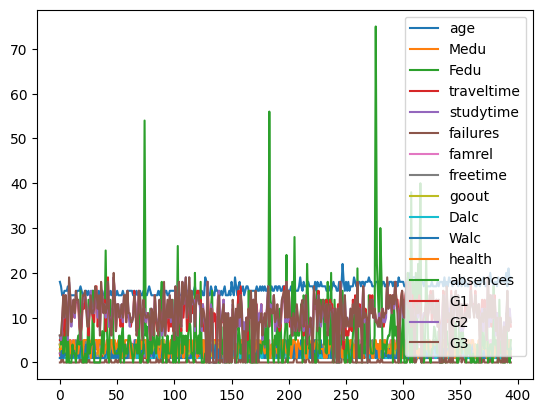

In [10]:
#Verificacion rapida de valores atipicos
df_final.plot()

In [11]:
#Creamos una variable sintetica binaria que nos indique si el estudiante aprobó o no el curso con una nota mayor o igual a 40 
df_final['Aprobado'] = (df['G1']+df['G2']+df['G3'] >= 40 ).astype(int) #Utilizamos la funcion .astype(int) para converitir los valores booleanos en 1 y 0
df_final['Aprobado'].value_counts()

Aprobado
0    292
1    103
Name: count, dtype: int64

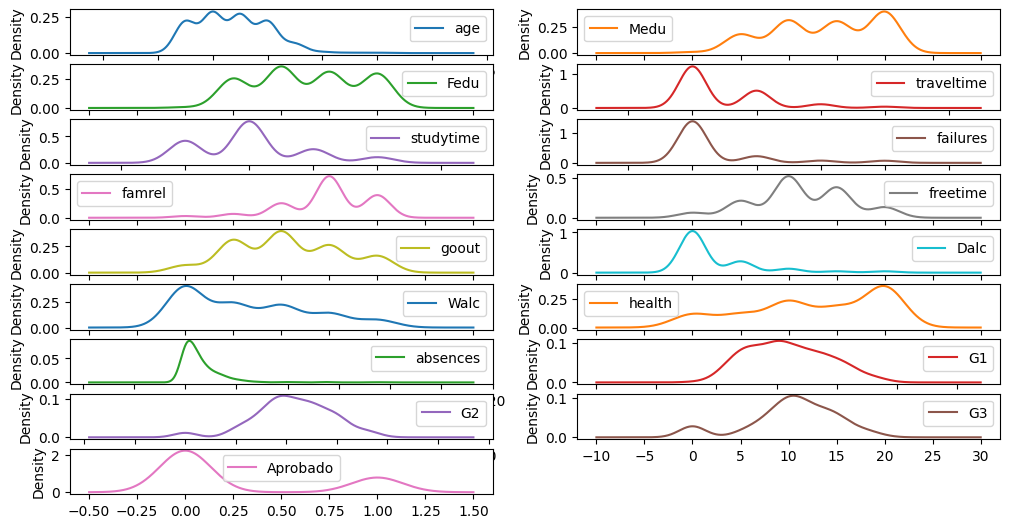

In [12]:
import math
df_dist = df_final.select_dtypes(include=['int64', 'float64', 'int32'])
n_cols = df_final.shape[1]
rows = math.ceil(n_cols / 2)  # Cambia 2 al número de columnas deseado por fila

df_final.plot(kind='density', subplots=True, layout=(rows, 2), figsize=(12, 12), sharex=False)
plt.show()


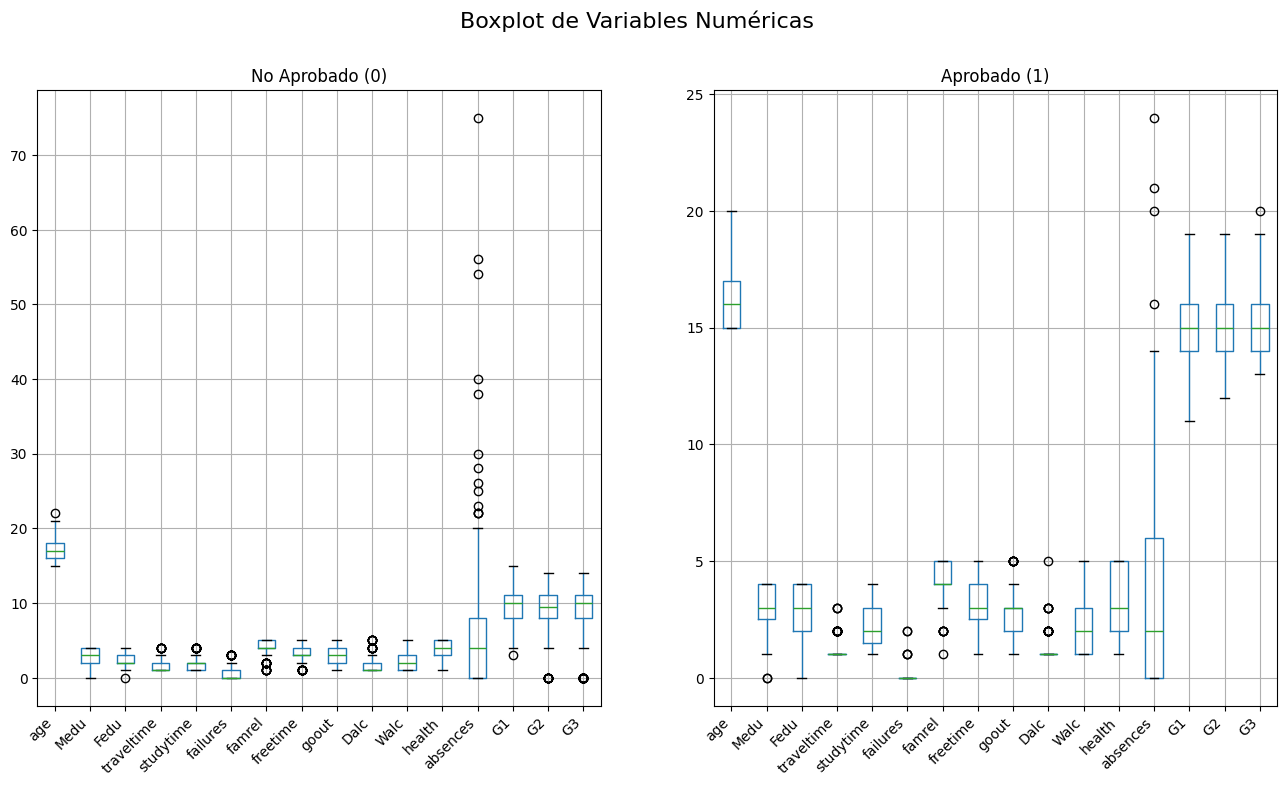

In [13]:
df_numeric = df_final.select_dtypes(include=['int64', 'float64','int32']).drop(columns=['Aprobado'])

# Crear el boxplot agrupado por 'Aprobado'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
df_numeric[df_final['Aprobado'] == 0].boxplot(ax=axes[0], rot=45)
df_numeric[df_final['Aprobado'] == 1].boxplot(ax=axes[1], rot=45)

# Títulos para cada subplot
axes[0].set_title("No Aprobado (0)")
axes[1].set_title("Aprobado (1)")

# Ajustar etiquetas en el gráfico izquierdo
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar título general
plt.suptitle("Boxplot de Variables Numéricas", fontsize=16)

plt.show()

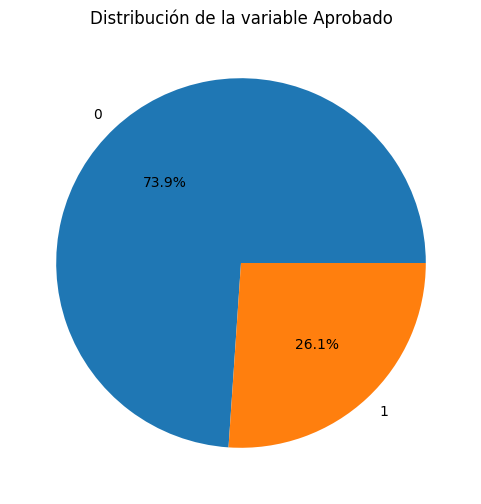

In [14]:
# Esta variable 'Aprobado' nos ayuda a entender como la variable objetivo esta mezclada en el DataFrame
# graficamos la variable en un diagrama de pie para para entender la distribucion.
Val_aprobado = df_final['Aprobado'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(Val_aprobado, labels=Val_aprobado.index, autopct='%1.1f%%')
plt.title('Distribución de la variable Aprobado')
plt.show()

In [15]:
# Matriz de correlación
corr_matrix = df_dist.corr()
#corr_matrix


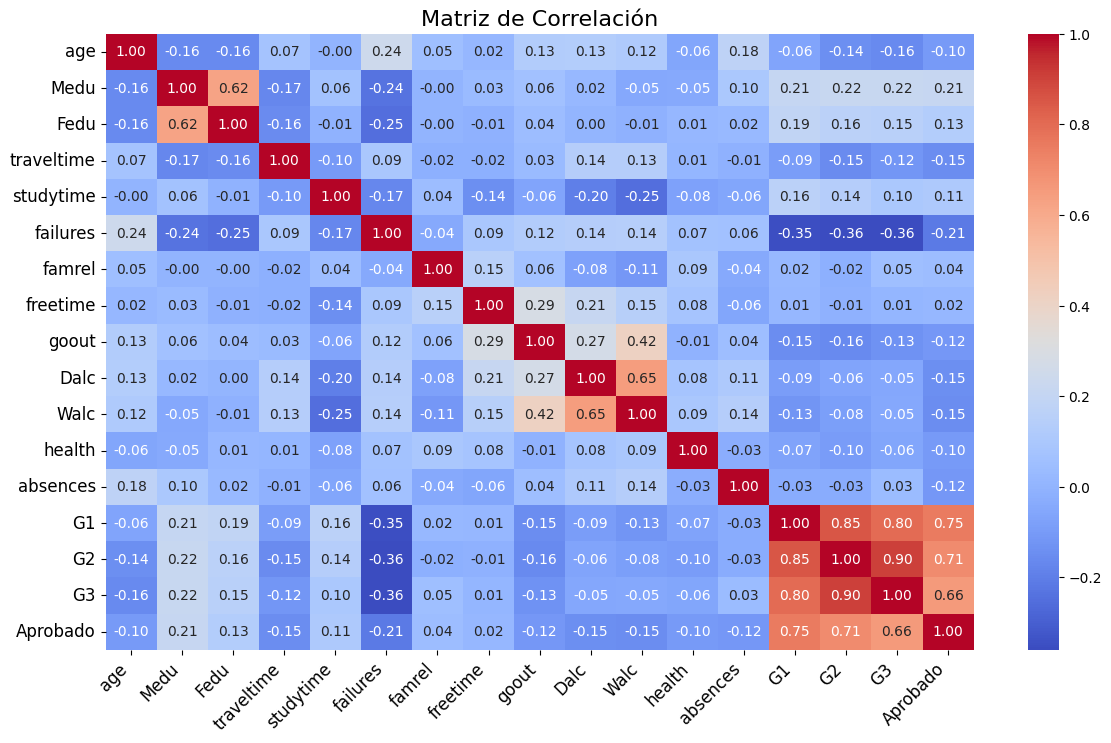

In [16]:
# Matriz de correlación
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# Ajustar la rotación de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Matriz de Correlación', fontsize=16)

plt.show()

## Variables categoricas

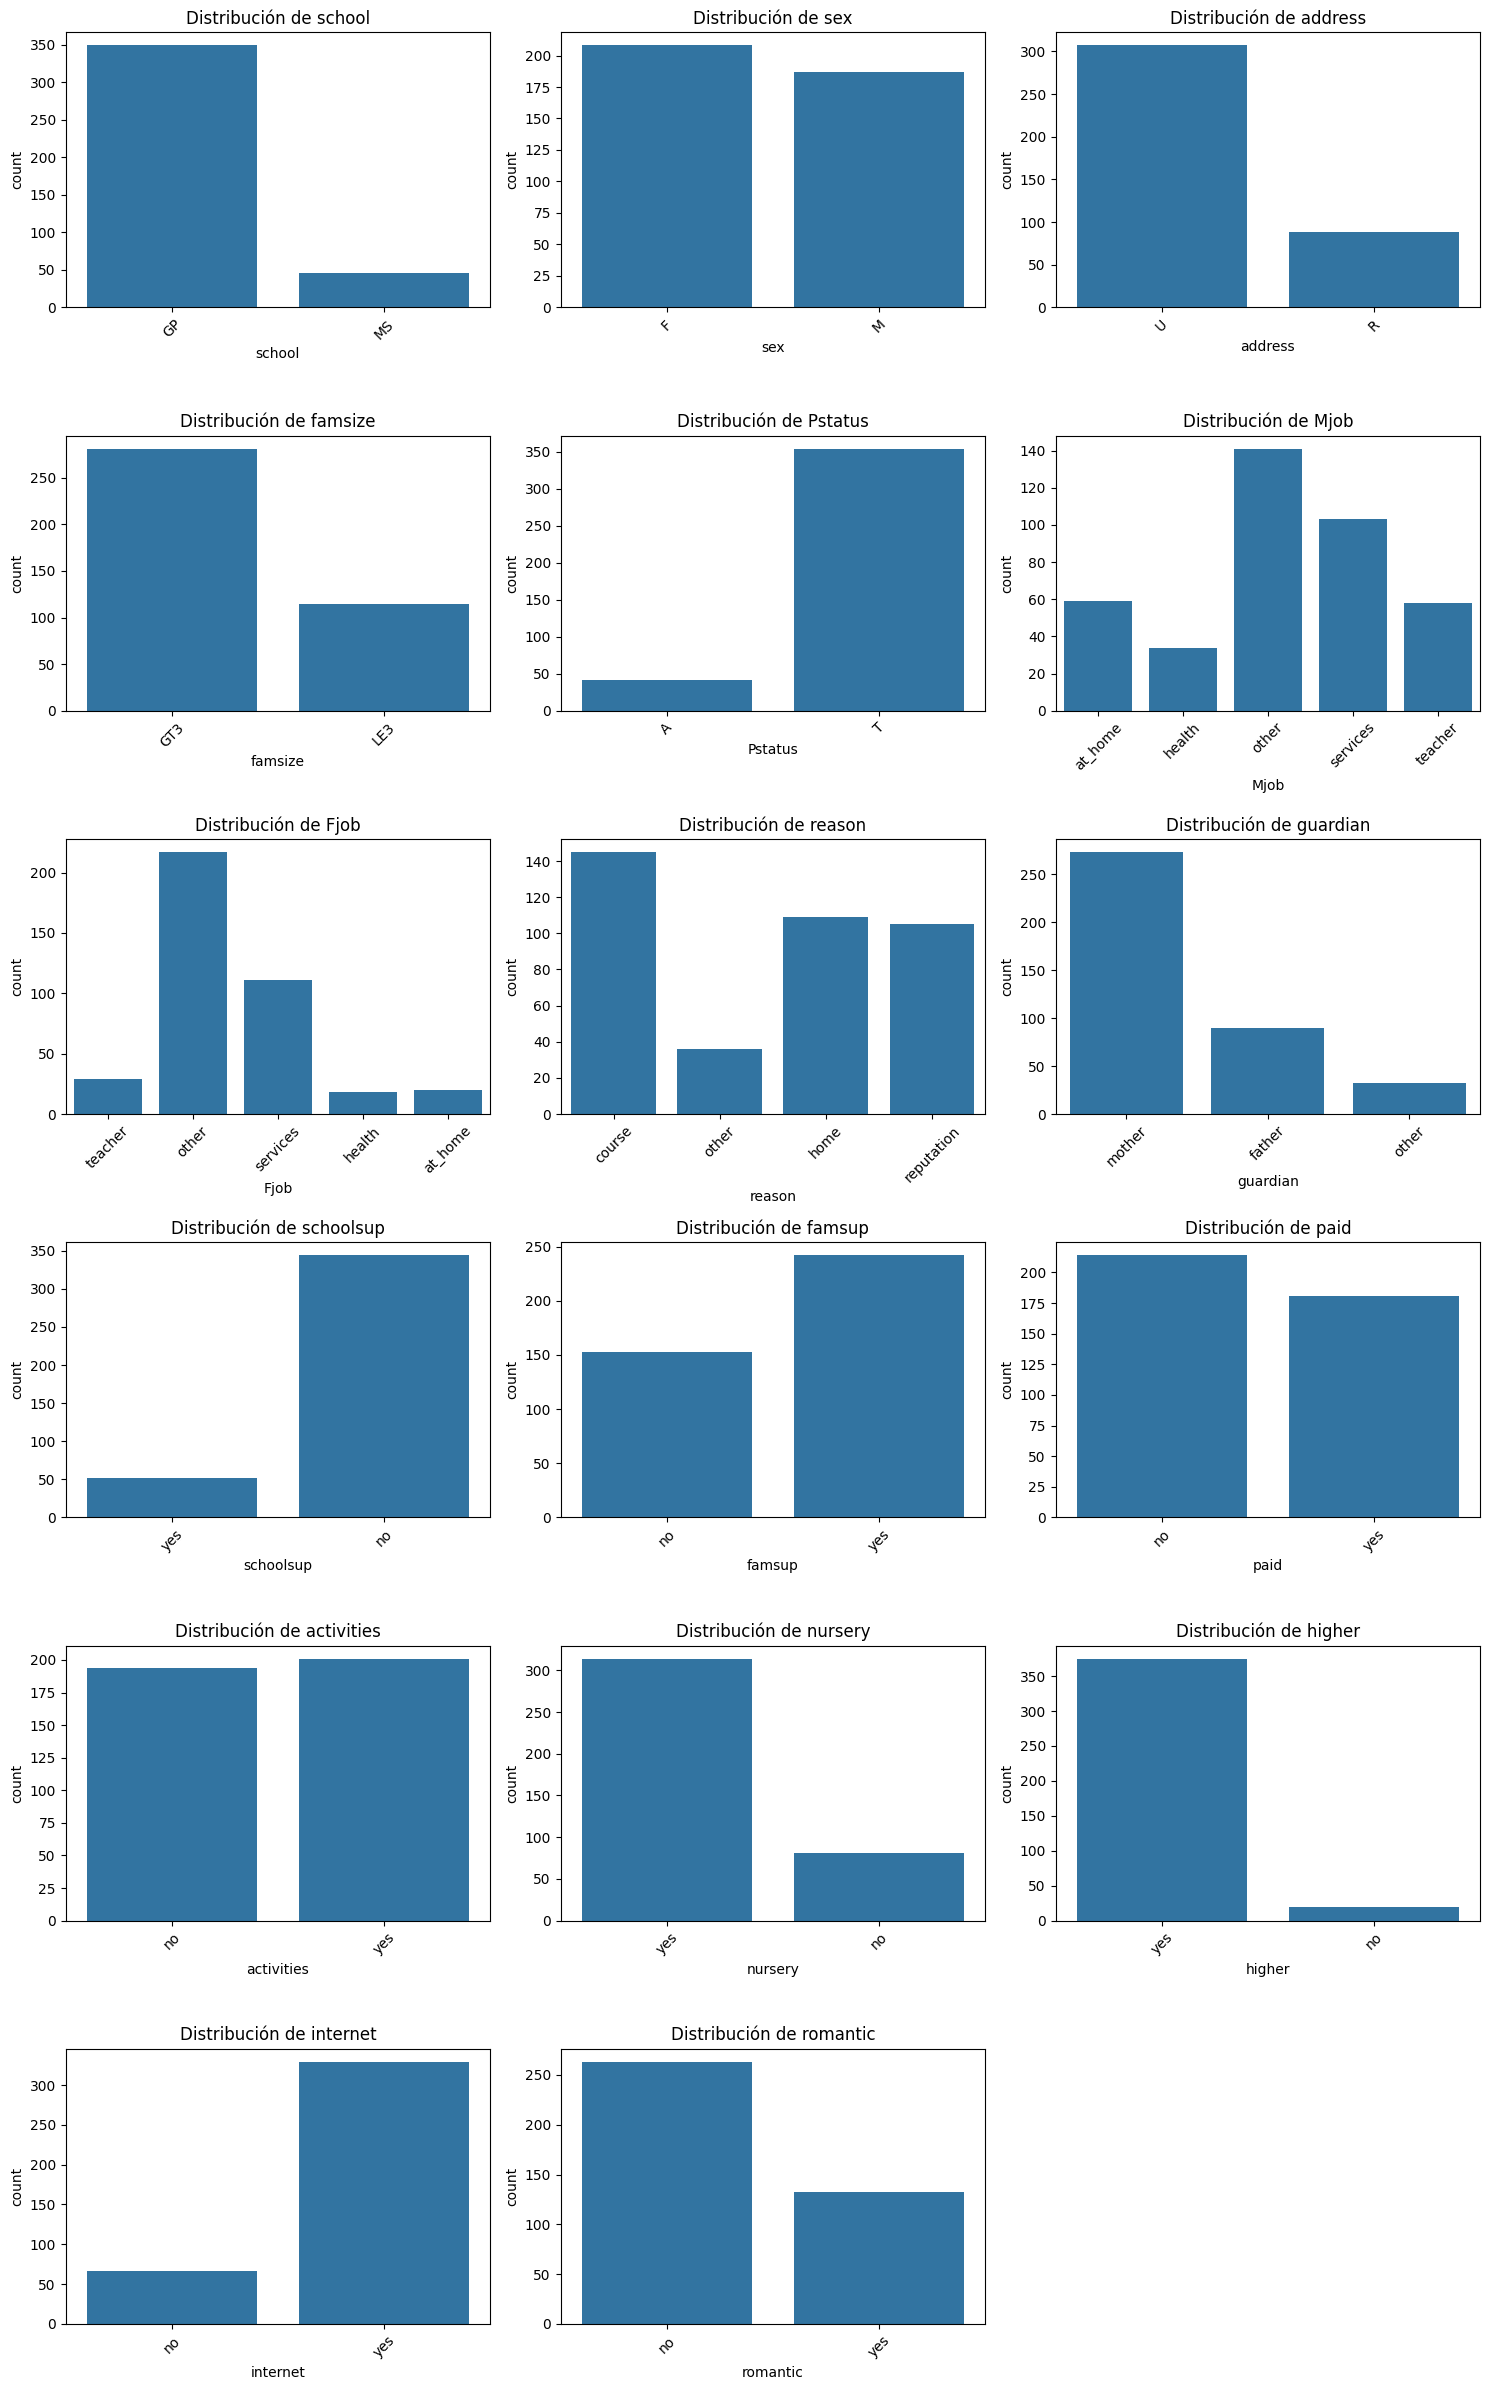

In [17]:
# Seleccionar las columnas categóricas
categorical_columns = df_final.select_dtypes(include='object').columns

# Configurar el tamaño de la cuadrícula
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = math.ceil(len(categorical_columns) / n_cols)  # Número de filas necesarias

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Graficar cada variable categórica en un subplot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df_final, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas si son largas

# Eliminar ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

## Estandarizacion de variables.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
#Separamos el dataframe en variables categoricas y numericas
categorical_columns = df_final.select_dtypes(include='object').columns
numeric_columns = df_final.select_dtypes(include=['int64', 'float64','int32']).columns.drop('Aprobado')

#Configuracion del column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ]
)

#Configuracion del pipeline
pipeline = Pipeline([('preprocessor', preprocessor)])

# Separar la variable objetivo
X = df_final.drop(columns=['Aprobado'])
y = df_final['Aprobado']

# Aplicar el preprocesamiento
X_processed = pipeline.fit_transform(X)

# Obtener los nombres de las columnas después del encoding
encoded_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns = list(numeric_columns) + list(encoded_columns)

# Crear un nuevo DataFrame con las columnas transformadas
X_final = pd.DataFrame(X_processed, columns=all_columns)


In [20]:
X_final.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [36]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    float64
 1   Medu               395 non-null    float64
 2   Fedu               395 non-null    float64
 3   traveltime         395 non-null    float64
 4   studytime          395 non-null    float64
 5   failures           395 non-null    float64
 6   famrel             395 non-null    float64
 7   freetime           395 non-null    float64
 8   goout              395 non-null    float64
 9   Dalc               395 non-null    float64
 10  Walc               395 non-null    float64
 11  health             395 non-null    float64
 12  absences           395 non-null    float64
 13  G1                 395 non-null    float64
 14  G2                 395 non-null    float64
 15  G3                 395 non-null    float64
 16  school_MS          395 non

In [21]:
X_final.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [22]:
#Retiro las columnas 'G1', 'G2', 'G3' ya que estas variables son parte de la variable objetivo
X_final_modelos = X_final.drop(columns=['G1', 'G2', 'G3'])
X_final_modelos.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


### Modelo de regresion logistica

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
#Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final_modelos, y, test_size=0.2, random_state=42, stratify=y) #stratify=y para mantener la proporcion de la variable objetivo ya que el dataset esta desbalanceado

#Configuracion del modelo
model = LogisticRegression(max_iter=1000, random_state=42)

#Entrenamiento del modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
#Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [26]:
#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)

Accuracy: 0.77
Matriz de Confusión:
[[52  6]
 [12  9]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.60      0.43      0.50        21

    accuracy                           0.77        79
   macro avg       0.71      0.66      0.68        79
weighted avg       0.76      0.77      0.76        79



### Modelo Arbol de decision.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final_modelos, y, test_size=0.2, random_state=42, stratify=y)

# Configurar el modelo
model = DecisionTreeClassifier(random_state=42, max_depth=15) 

# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [29]:
#Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [30]:
#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)


Accuracy: 0.70
Matriz de Confusión:
[[46 12]
 [12  9]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        58
           1       0.43      0.43      0.43        21

    accuracy                           0.70        79
   macro avg       0.61      0.61      0.61        79
weighted avg       0.70      0.70      0.70        79



### Modelo RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final_modelos, y, test_size=0.2, random_state=42, stratify=y)

# Configurar el modelo
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=15, class_weight='balanced')

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [33]:
#Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [34]:
#Evaluacion del modelo

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)

Accuracy: 0.75
Matriz de Confusión:
[[56  2]
 [18  3]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        58
           1       0.60      0.14      0.23        21

    accuracy                           0.75        79
   macro avg       0.68      0.55      0.54        79
weighted avg       0.72      0.75      0.68        79



# Revisar esto Técnicas de Balanceo de Clases en el Conjunto de Datos

In [35]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final_modelos, y, test_size=0.2, random_state=42, stratify=y)

#Configurar el modelo
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

c:\Users\aluca\miniconda3\envs\machine_learning_uno\Lib\site-packages\xgboost\core.py:158: UserWarning:

[23:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Hacemos predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [ ]:
#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)


Accuracy: 0.73
Matriz de Confusión:
[[49  9]
 [12  9]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        58
           1       0.50      0.43      0.46        21

    accuracy                           0.73        79
   macro avg       0.65      0.64      0.64        79
weighted avg       0.72      0.73      0.73        79

